<a href="https://colab.research.google.com/github/nyp-sit/nypi/blob/main/day2am/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.nyp.edu.sg/content/dam/nyp/logo.png" width='200'/>

Welcome to the lab! Before we get started here are a few pointers on Collab notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.

# Practical: Clustering



## Objectives

- Learn to generate data points suitable for clustering practises using Scikit-Learn.
- Learn to perform clustering of a set of data points using Scikit-Learn k-Means algorithm.
- Examine how to identify a suitable number of clusters.

## Clustering

Clustering algorithms partition data objects into several groups, subsets or categories. They help to discover groups of data samples with similar values or patterns. These techniques are used in many domains like:
- Engineering - Information Compression, noise removal
- Computer Science - Web mining, Information Retrieval
- Life and Medical Science – Taxonomy definition, gene and protein function identification
- Astronomy and Earth Science – Classification of stars and planets
- Social Science – Behaviour pattern analysis, relation identification among cultures
- Economics – Customer characteristics pattern recognition, stock trend analysis, fraud detection

Clustering is sometimes performed before predictive modelling. After clustering, we can study and model each individual cluster separately or use the cluster grouping as an additional input for subsequent modelling processes.

There are many different clustering algorithms, but only a few are widely used. This is because many hierarchical clustering methods require that distances between every pair of data points to be stored and updated in memory, which places a substantial demand on computer memory and processing resources if the data set is large. Typically, we use the k-Means clustering algorithm which is less demanding on the memory requirements.

In the first part of the practical, we will look at how we can apply the k-Means clustering algorithm using Scikit-Learn.

## Generate Data

Let us begin by generating some data for our practises.

### Step 1
Run the following codes to generate 500 data points centered around 3 centroids, that is, the 500 data points forms 3 clusters.



In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

#data = Generated data examples that forms 3 clusters
#classes = The cluster that each example belongs to
data, classes = make_blobs(500, centers=3, random_state=42)


Note that the ```data``` variable contains the generated 2-D samples while the ```classes``` variable contains the cluster number each sample belongs to.



### Step 2

Print out the first 10 items of the data and classes variables to see the generated data.

<details>
<summary>
    Click here to see code
</summary>


```
print(data[:10])
print(classes[:10])
```

In [ ]:
#Enter code here


You should see the content of data and classes variables as follows:

The ```data``` variable consists of an array of 2-dimensional points:

```
[[-5.73035386 -7.58328602]
 [ 1.94299219  1.91887482]
 [ 6.82968177  1.1648714 ]
 [-2.90130578  7.55077118]
 [ 5.84109276  1.56509431]
 [ 5.47021465  1.11708586]
 [-4.31954265 -6.97616949]
 [ 4.91033566  1.92293157]
 [ 3.57225841  1.8307902 ]
 [-7.50444577 -6.85401854]]

```


The ```classes``` variable contains the cluster number that each data point belongs to:

```
[2 1 1 0 1 1 2 1 1 2]
```

Note that we have the actual cluster that the data belongs to because we generated the data. In real-life situations, we will not have this information.

Later, we will be using the k-Means clustering algorithm to cluster the data point, the ```classes``` variable will be  useful for us to compare and measure the clustering performance of the algoritm.


### Step 3 Visualize the Data

We should visualize the data so that we have a feel of how the data is like before we perform the clustering process.

Run the following codes to generate a scatter plot of the data:



In [ ]:
import matplotlib.pyplot as plt
#Create a figure
#plt.figure()
#Red, green and blue will be used to colour the clusters
rgb = np.array(['r', 'g', 'b'])
#Create scatter plot based on the first (0) and second column (1)
plt.scatter(data[:, 0], data[:, 1], color=rgb[classes])
plt.title("Clusters")
plt.show()

The code uses three different colours to show the individual clusters. If you run the codes, you should be able to see the following figures:

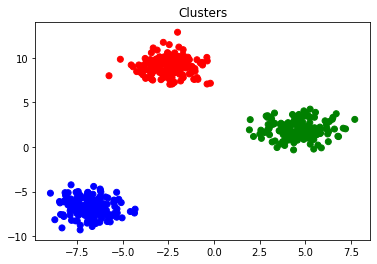

Note that we set the random_state argument of the make_blob() function as 42 for reproducible result.  You can try to use different number to generate different clusters if you prefer. Whatever integer values you choose, you should be able to see three separate clusters.

## k-Means Clustering

k-means clustering is a relatively quick method for exploring clusters in data. The user sets the number of clusters (hyper-parameter k) to be created, and the procedure selects k well-spaced data records as starting centroid. Each data record is then assigned to the nearest centroid of the k clusters. The cluster centroids (average value of the attributes used in the clustering) are updated to accommodate the new members. Additional data passes are made as needed. As the cluster centers shift, a data point may need to be moved to its new nearest centroid.

For the hyper-parameter k, we usually do not know what is a good value for k. We typically need to run the clustering process several times to find a suitable value for k. We will explore this in the later section.

Let us now use Scikit-Learn's k-Means algorithm to perform clustering and visually inspect how well the clustering was done.

### Step 4 Performing k-Means Clustering

Run the following codes to perform clustering:


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

#data = Generated data examples that forms 3 clusters
#classes = The cluster that each example belongs to
#We use 1000 points
data, classes = make_blobs(1000, centers=3, random_state=42)

#Import the k-Means algorithm
from sklearn.cluster import KMeans

#Perform the clustering
kmeans = KMeans(n_clusters=3).fit(data)

### Step 5 Plotting Clustering Results

It will be useful if we can visualize our clustering results, use the following codes to plot the clusters:



In [ ]:
#Create a new plot
plt.figure()

#Subplot on the left
#121 = 1 row, 2 columns, subplot plot 1
plt.subplot(121) #Use subplot() to plot the generated data and results from k-Means clustering
#Use different colours for different cluster based on the generated data.
rgb = np.array(['r', 'g', 'b'])
plt.scatter(data[:, 0], data[:, 1], color=rgb[classes])
plt.title("Generated Data")


#Subplot on the right
#122 = 1 row, 2 columns, subplot plot 2
plt.subplot(122)
#Plot the same data except use results from our k-mean clustering(kmeans.labels_)
#Different colours for different cluster based kmeans.labels_
plt.scatter(
    data[:, 0],  #x
    data[:, 1],  #y
    color=rgb[kmeans.labels_])

#Plot the centroid of the clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0], #x
    kmeans.cluster_centers_[:, 1], #y
    marker="*", # use a star
    s=200, # size is 200 (bigger)
    color="Yellow",
    label="Centroid")
plt.title("Clustered by k-Means")
plt.legend()
plt.show()


Run the codes to view the clustering results.


As can be seen from the above plots, the k-Means algorithm has formed three clusters since we indicated ```center=3```.

From visual inspection, we can see that the algorithm has done a good job of clustering the data points, the generated cluster membership closely resembles that in the ```classes``` variable. Choose the correct k value (k=3) certainly plays a part as it coincides with our generated data. However, in most real cases, we might not know the number of clusters and must make a guess, what happens if we try other values of k?


## Exercise

Modify the codes and try different values of k (e.g 2, 4, 5). Remember to add more colours to the rbg array if necessary.
```python
rgb = np.array(['r', 'g', 'b', 'y']) #if k=4, needs to have at least 4 colours
```
For reference, acceptable single character colours are:
```python
{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
```

Shown below is the result for value of k=4:

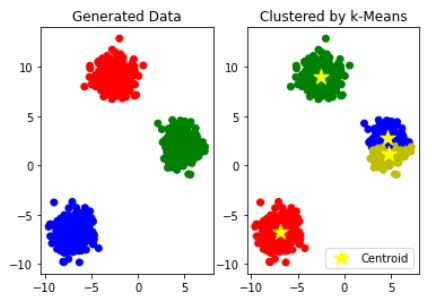


<details>
    <summary>Click here to see code</summary>

```python
import numpy as np
from sklearn.datasets import make_blobs

#data = Generated data examples that forms 3 clusters
#classes = The cluster that each example belongs to
#We use 1000 points
data, classes = make_blobs(1000, centers=4, random_state=42)

#Import the k-Means algorithm
from sklearn.cluster import KMeans

#Perform the clustering
kmeans = KMeans(n_clusters=4).fit(data)

#Enter your codes here

plt.figure()

#Subplot on the left
#121 = 1 row, 2 columns, subplot plot 1
plt.subplot(121) #Use subplot() to plot the generated data and results from k-Means clustering
#Use different colours for different cluster based on the generated data.
rgb = np.array(['r', 'g', 'b', 'y'])
plt.scatter(data[:, 0], data[:, 1], color=rgb[classes])
plt.title("Generated Data")


#Subplot on the right
#122 = 1 row, 2 columns, subplot plot 2
plt.subplot(122)
#Plot the same data except use results from our k-mean clustering(kmeans.labels_)
#Different colours for different cluster based kmeans.labels_
plt.scatter(
    data[:, 0],  #x
    data[:, 1],  #y
    color=rgb[kmeans.labels_])

#Plot the centroid of the clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0], #x
    kmeans.cluster_centers_[:, 1], #y
    marker="*", # use a star
    s=200, # size is 200 (bigger)
    color="Yellow",
    label="Centroid")
plt.title("Clustered by k-Means")
plt.legend()
```

In [ ]:
# Type your code here